Feature Engineering

In [1]:
import pandas as pd

ds_preprocessed = pd.read_csv('Datasets/ds_preprocessed.csv')
ds_preprocessed.head(10)

,age,minutes_played,points,rebounds,assists,steals,blocks,turnovers,fg_pct,three_pct,...,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,game_location_Home
0,25,12.2,9,3,0,1,1,2,51.4,19.6,...,0,0,0,0,0,0,0,0,0,1
1,25,30.9,15,14,5,1,2,0,41.0,31.2,...,0,0,0,0,0,0,0,0,0,0
2,30,18.9,11,4,2,1,0,2,47.4,28.0,...,0,0,0,0,0,0,0,0,0,0
3,27,20.0,12,4,2,0,0,3,49.3,45.8,...,0,0,0,0,0,0,0,0,1,0
4,29,27.8,16,10,4,1,0,2,34.5,22.5,...,1,0,0,0,0,0,0,0,0,0
5,30,32.3,17,5,6,1,1,3,46.6,41.2,...,0,0,0,0,0,0,0,0,0,0
6,25,15.7,10,6,1,0,1,3,44.0,28.2,...,0,0,0,0,1,0,0,0,0,0
7,27,20.3,14,2,3,0,0,2,41.4,37.3,...,0,0,0,0,0,0,0,0,0,0
8,26,40.9,23,4,10,1,2,2,52.7,40.1,...,0,0,0,0,0,0,0,0,0,0
9,30,21.1,10,1,2,1,1,0,60.6,41.0,...,0,0,0,0,1,0,0,0,0,1


In [2]:
# Per-Minute Features
# Per-minute stats reduce noise and normalize performance across players with different playtimes
minute_eps = 1e-6  # small constant to avoid division by zero

df = ds_preprocessed.copy()

df["points_per_min"]     = df["points"]     / (df["minutes_played"] + minute_eps)
df["rebounds_per_min"]   = df["rebounds"]   / (df["minutes_played"] + minute_eps)
df["assists_per_min"]    = df["assists"]    / (df["minutes_played"] + minute_eps)
df["steals_per_min"]     = df["steals"]     / (df["minutes_played"] + minute_eps)
df["blocks_per_min"]     = df["blocks"]     / (df["minutes_played"] + minute_eps)
df["turnovers_per_min"]  = df["turnovers"]  / (df["minutes_played"] + minute_eps)
df["efficiency_per_min"] = df["efficiency"] / (df["minutes_played"] + minute_eps)

In [3]:
# Usage & Contribution Features
# These features capture overall player's involvement in the game

df["usage_rate"] = (df["points"] + df["assists"] + df["turnovers"]) / (df["minutes_played"] + minute_eps)
df["impact_metric"] = (
    df["points"] + df["rebounds"] + df["assists"]
) / (df["minutes_played"] + minute_eps)
df["scoring_consistency"] = df["fg_pct"] * df["points_per_min"]

In [4]:
# Binned Features
# Binning continuous variables can help capture non-linear relationships
# It helps tree models create clean splits based on ranges

# --- Age bins ---
df["age_bin"] = pd.cut(df["age"],
                       bins=[0, 24, 28, 32, 100],
                       labels=["young", "prime", "mature", "veteran"])

# --- Rest days bins ---
df["rest_bin"] = pd.cut(df["rest_days"],
                        bins=[-1, 0, 2, 10],
                        labels=["back_to_back", "normal_rest", "well_rest"])

# --- Plus/minus bins ---
df["pm_bin"] = pd.cut(df["plus_minus"],
                      bins=[-100, -1, 1, 100],
                      labels=["negative", "neutral", "positive"])

In [5]:
# One-Hot Encoding Categorical Variables
# Convert categorical variables into binary indicators
categorical_cols = ["age_bin", "rest_bin", "pm_bin"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [6]:
df.head(10)

,age,minutes_played,points,rebounds,assists,steals,blocks,turnovers,fg_pct,three_pct,...,usage_rate,impact_metric,scoring_consistency,age_bin_prime,age_bin_mature,age_bin_veteran,rest_bin_normal_rest,rest_bin_well_rest,pm_bin_neutral,pm_bin_positive
0,25,12.2,9,3,0,1,1,2,51.4,19.6,...,0.901639,0.983606,37.918030,True,False,False,True,False,False,False
1,25,30.9,15,14,5,1,2,0,41.0,31.2,...,0.647249,1.100324,19.902912,True,False,False,True,False,True,False
2,30,18.9,11,4,2,1,0,2,47.4,28.0,...,0.793651,0.899471,27.587300,False,True,False,True,False,False,False
3,27,20.0,12,4,2,0,0,3,49.3,45.8,...,0.850000,0.900000,29.579999,True,False,False,True,False,False,True
4,29,27.8,16,10,4,1,0,2,34.5,22.5,...,0.791367,1.079137,19.856114,False,True,False,True,False,False,True
5,30,32.3,17,5,6,1,1,3,46.6,41.2,...,0.804954,0.866873,24.526315,False,True,False,False,False,False,False
6,25,15.7,10,6,1,0,1,3,44.0,28.2,...,0.891720,1.082802,28.025476,True,False,False,True,False,False,False
7,27,20.3,14,2,3,0,0,2,41.4,37.3,...,0.935961,0.935961,28.551723,True,False,False,False,False,False,True
8,26,40.9,23,4,10,1,2,2,52.7,40.1,...,0.855746,0.904645,29.635696,True,False,False,False,True,False,True
9,30,21.1,10,1,2,1,1,0,60.6,41.0,...,0.568720,0.616114,28.720378,False,True,False,True,False,False,False


In [7]:
# Convert all boolean columns to integers
df_enginered = df.astype({col: "int" for col in df.select_dtypes("bool").columns})
pd.set_option('display.max_columns', None)
df_enginered.head()

,age,minutes_played,points,rebounds,assists,steals,blocks,turnovers,fg_pct,three_pct,ft_pct,plus_minus,efficiency,rest_days,target,position_PF,position_PG,position_SF,position_SG,team_BKN,team_BOS,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHX,team_POR,team_SAC,team_SAS,team_TOR,team_UTA,team_WAS,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_LAL,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_TOR,opponent_UTA,opponent_WAS,game_location_Home,points_per_min,rebounds_per_min,assists_per_min,steals_per_min,blocks_per_min,turnovers_per_min,efficiency_per_min,usage_rate,impact_metric,scoring_consistency,age_bin_prime,age_bin_mature,age_bin_veteran,rest_bin_normal_rest,rest_bin_well_rest,pm_bin_neutral,pm_bin_positive
0,25,12.2,9,3,0,1,1,2,51.4,19.6,79.9,-3,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.737705,0.245902,0.000000,0.081967,0.081967,0.163934,0.983606,0.901639,0.983606,37.918030,1,0,0,1,0,0,0
1,25,30.9,15,14,5,1,2,0,41.0,31.2,68.1,1,37,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.485437,0.453074,0.161812,0.032362,0.064725,0.000000,1.197411,0.647249,1.100324,19.902912,1,0,0,1,0,1,0
2,30,18.9,11,4,2,1,0,2,47.4,28.0,78.2,-2,16,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.582011,0.211640,0.105820,0.052910,0.000000,0.105820,0.846561,0.793651,0.899471,27.587300,0,1,0,1,0,0,0
3,27,20.0,12,4,2,0,0,3,49.3,45.8,68.1,7,15,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.600000,0.200000,0.100000,0.000000,0.000000,0.150000,0.750000,0.850000,0.900000,29.579999,1,0,0,1,0,0,1
4,29,27.8,16,10,4,1,0,2,34.5,22.5,76.0,7,29,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.575540,0.359712,0.143885,0.035971,0.000000,0.071942,1.043165,0.791367,1.079137,19.856114,0,1,0,1,0,0,1


In [8]:
df_enginered.shape

(9000, 95)

Feature Selection

Reducing dimensionality via Feature Selection is crucial for optimizing inference time, lowering compute costs, and potentially improving model stability, especially in production environments like Sagemaker.

Feature Importance (Tree-Based):
Using XGBoost's built-in feature importance is a highly efficient and effective way to rank the predictive power of the 95 engineered features.
This is highly recommended for the project. It leverages the power of the likely final model to identify the most predictive features among the 95.

XGBoost

Features automatically selected. X shape: (9000, 94), Y shape: (9000,)
--------------------------------------------------
Training XGBoost for feature ranking...


c:\Users\carlo\OneDrive\Documents\python_virtual_env\data_science_1\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:54:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



### Top 10 Most Predictive Features (XGBoost Gain) ###
             Feature  Importance
0         efficiency    0.277359
1             points    0.020521
2         plus_minus    0.020305
3          turnovers    0.018901
4     blocks_per_min    0.017389
5  turnovers_per_min    0.016013
6           team_LAL    0.015998
7       opponent_GSW    0.015386
8           team_CHA    0.013839
9     steals_per_min    0.013797
--------------------------------------------------

### Cumulative Feature Importance Summary ###
Features needed for 90% of total predictive power: 57
Features needed for 95% of total predictive power: 64


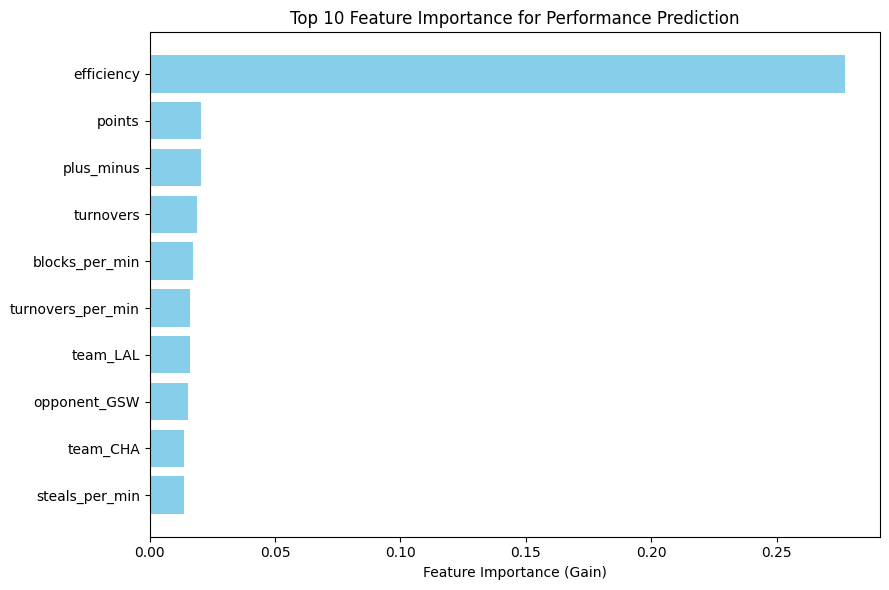

In [9]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Automated Data Preparation ---

# Define the target column name
TARGET_COLUMN = 'target'

# Create the feature matrix X by dropping ONLY the target column
# This automatically selects all 94 feature columns regardless of their names or order.
X = df_enginered.drop(columns=[TARGET_COLUMN], errors='ignore') 
y = df_enginered[TARGET_COLUMN]

# Get the list of feature names directly from the resulting X DataFrame
feature_names = X.columns.tolist() # converts something (usually a NumPy array, Pandas Series, or Index object) into a plain Python list

print(f"Features automatically selected. X shape: {X.shape}, Y shape: {y.shape}")
print("-" * 50)


# --- 2. XGBoost Model Training and Importance Extraction ---

# Initialize and train the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic', 
    n_estimators=100,  # Moderate number of trees for quick ranking
    learning_rate=0.1, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42,
    max_depth=5       # Moderate depth to prevent deep overfitting during ranking
)

print("Training XGBoost for feature ranking...")
xgb_clf.fit(X, y)


# --- 3. Analyze and Display Feature Importance ---

# Extract feature importance scores (based on 'gain')
importance = xgb_clf.feature_importances_

# Create a DataFrame to map names to scores and sort
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\n### Top 10 Most Predictive Features (XGBoost Gain) ###")
print(feature_importance_df.head(10))
print("-" * 50)

# Calculate and display cumulative importance
feature_importance_df['Cumulative_Importance'] = feature_importance_df['Importance'].cumsum() # calculates the cumulative sum of a sequence

# Find the number of features needed for 90% and 95% of total importance
# Use boolean indexing and .idxmax() to find the index where the cumulative importance first crosses the threshold
features_for_90_percent = feature_importance_df[feature_importance_df['Cumulative_Importance'] >= 0.90].index.min() + 1
features_for_95_percent = feature_importance_df[feature_importance_df['Cumulative_Importance'] >= 0.95].index.min() + 1

print("\n### Cumulative Feature Importance Summary ###")
print(f"Features needed for 90% of total predictive power: {features_for_90_percent}")
print(f"Features needed for 95% of total predictive power: {features_for_95_percent}")

# --- 4. Visualization ---
# 
plt.figure(figsize=(9, 6))
plt.barh(
    feature_importance_df['Feature'].head(10).iloc[::-1], # Plot in ascending order for better readability
    feature_importance_df['Importance'].head(10).iloc[::-1],
    color='skyblue'
)
plt.xlabel('Feature Importance (Gain)')
plt.title('Top 10 Feature Importance for Performance Prediction')
plt.tight_layout()
plt.show()

Selecting the features needed for 95% of total importance

In [10]:
# --- 5. Final Feature Selection for Modeling ---

# Define the number of features to keep based on the 95% threshold
N_FEATURES_TO_KEEP = 64

# 1. Select the names of the top N features
top_n_features = feature_importance_df['Feature'].head(N_FEATURES_TO_KEEP).tolist()

# 2. Add the target column back to the list for final model preparation
final_columns = top_n_features + [TARGET_COLUMN] 

# 3. Create the final, reduced DataFrame
df_final = df_enginered[final_columns].copy()

print(f"✅ Final feature matrix created with {df_final.shape[1]} features.")
df_final.head()


✅ Final feature matrix created with 65 features.


,efficiency,points,plus_minus,turnovers,blocks_per_min,turnovers_per_min,team_LAL,opponent_GSW,team_CHA,steals_per_min,team_MIA,steals,points_per_min,opponent_IND,opponent_CHA,opponent_DAL,blocks,position_SF,team_OKC,opponent_DEN,team_DAL,assists_per_min,team_BKN,team_CHI,opponent_LAL,efficiency_per_min,team_HOU,opponent_CLE,opponent_UTA,opponent_LAC,opponent_OKC,scoring_consistency,team_NOP,game_location_Home,age,assists,rebounds_per_min,team_GSW,usage_rate,team_MIN,opponent_MIL,opponent_NOP,age_bin_prime,three_pct,pm_bin_neutral,position_PG,team_PHI,opponent_NYK,opponent_ORL,minutes_played,team_SAC,opponent_DET,rest_days,fg_pct,team_TOR,impact_metric,ft_pct,team_DET,position_PF,team_CLE,rebounds,opponent_SAC,opponent_SAS,team_LAC,target
0,12,9,-3,2,0.081967,0.163934,0,0,0,0.081967,0,1,0.737705,0,0,0,1,0,0,0,0,0.000000,0,0,0,0.983606,0,0,0,0,0,37.918030,1,1,25,0,0.245902,0,0.901639,0,0,0,1,19.6,0,0,0,0,0,12.2,0,0,2,51.4,0,0.983606,79.9,0,0,0,3,0,0,0,0
1,37,15,1,0,0.064725,0.000000,0,0,0,0.032362,0,1,0.485437,0,0,0,2,0,0,0,0,0.161812,0,0,0,1.197411,0,0,0,0,0,19.902912,0,0,25,5,0.453074,0,0.647249,0,0,0,1,31.2,1,0,0,0,0,30.9,0,0,1,41.0,0,1.100324,68.1,0,0,0,14,0,0,0,1
2,16,11,-2,2,0.000000,0.105820,0,0,0,0.052910,0,1,0.582011,0,0,0,0,0,0,0,0,0.105820,0,0,0,0.846561,0,0,0,0,0,27.587300,0,0,30,2,0.211640,0,0.793651,0,0,1,0,28.0,0,0,0,0,0,18.9,0,0,2,47.4,0,0.899471,78.2,0,1,0,4,0,0,0,0
3,15,12,7,3,0.000000,0.150000,0,0,0,0.000000,0,0,0.600000,0,0,0,0,0,0,0,0,0.100000,0,0,0,0.750000,0,0,0,0,0,29.579999,0,0,27,2,0.200000,0,0.850000,0,0,0,1,45.8,0,0,0,0,0,20.0,0,0,2,49.3,0,0.900000,68.1,0,0,0,4,0,0,0,0
4,29,16,7,2,0.000000,0.071942,0,0,0,0.035971,0,1,0.575540,0,0,0,0,0,0,0,0,0.143885,0,0,0,1.043165,0,0,0,0,0,19.856114,0,0,29,4,0.359712,0,0.791367,0,0,0,0,22.5,0,0,1,0,1,27.8,0,0,1,34.5,0,1.079137,76.0,0,0,0,10,0,0,0,1


In [11]:
top_n_features

['efficiency',
 'points',
 'plus_minus',
 'turnovers',
 'blocks_per_min',
 'turnovers_per_min',
 'team_LAL',
 'opponent_GSW',
 'team_CHA',
 'steals_per_min',
 'team_MIA',
 'steals',
 'points_per_min',
 'opponent_IND',
 'opponent_CHA',
 'opponent_DAL',
 'blocks',
 'position_SF',
 'team_OKC',
 'opponent_DEN',
 'team_DAL',
 'assists_per_min',
 'team_BKN',
 'team_CHI',
 'opponent_LAL',
 'efficiency_per_min',
 'team_HOU',
 'opponent_CLE',
 'opponent_UTA',
 'opponent_LAC',
 'opponent_OKC',
 'scoring_consistency',
 'team_NOP',
 'game_location_Home',
 'age',
 'assists',
 'rebounds_per_min',
 'team_GSW',
 'usage_rate',
 'team_MIN',
 'opponent_MIL',
 'opponent_NOP',
 'age_bin_prime',
 'three_pct',
 'pm_bin_neutral',
 'position_PG',
 'team_PHI',
 'opponent_NYK',
 'opponent_ORL',
 'minutes_played',
 'team_SAC',
 'opponent_DET',
 'rest_days',
 'fg_pct',
 'team_TOR',
 'impact_metric',
 'ft_pct',
 'team_DET',
 'position_PF',
 'team_CLE',
 'rebounds',
 'opponent_SAC',
 'opponent_SAS',
 'team_LAC']

In [ ]:
# Save the engineered dataset to a new CSV file
df_final.to_csv('Datasets/ds_feature_eng.csv', index=False)